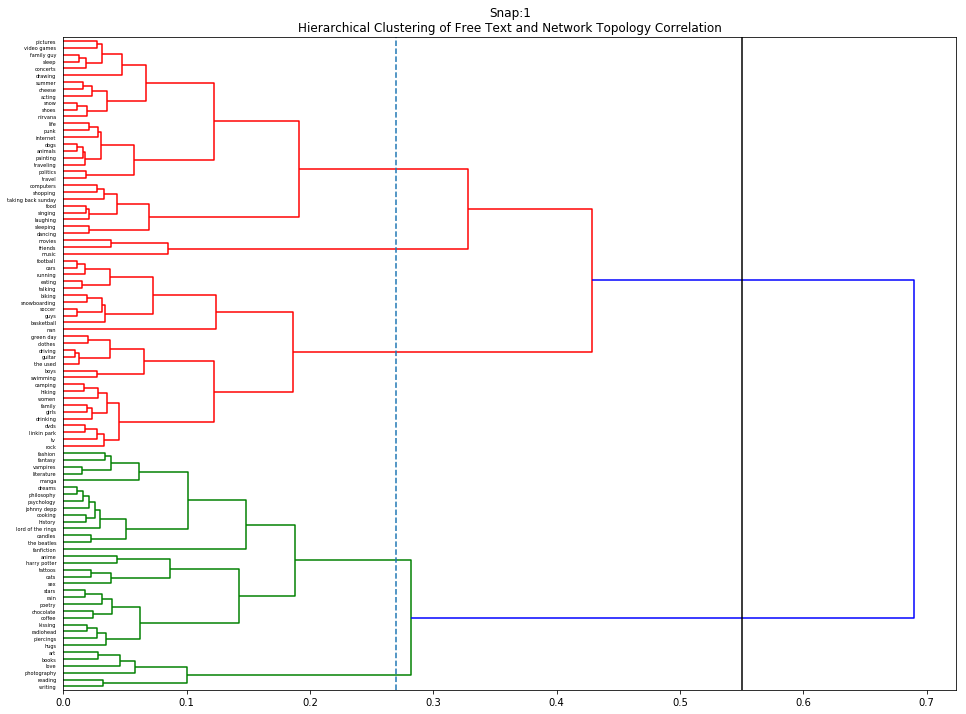

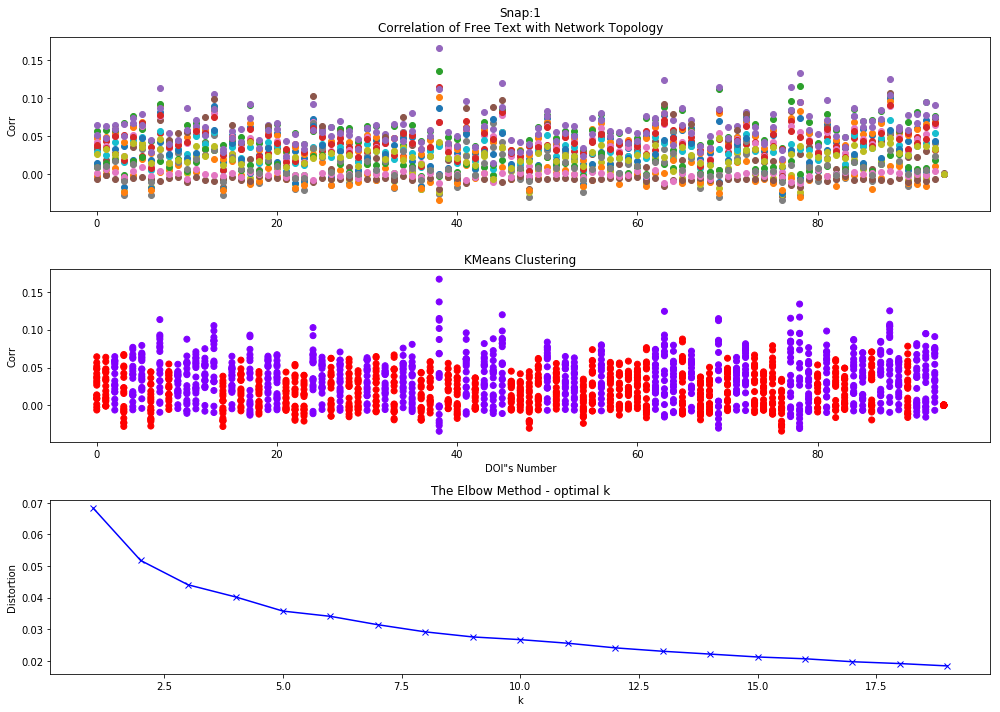

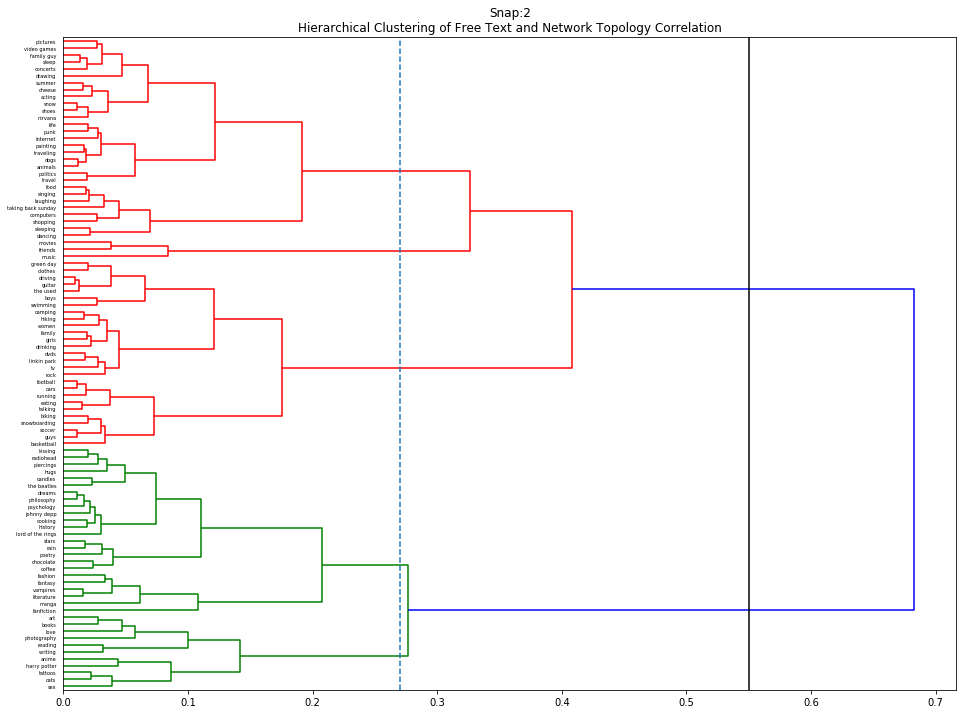

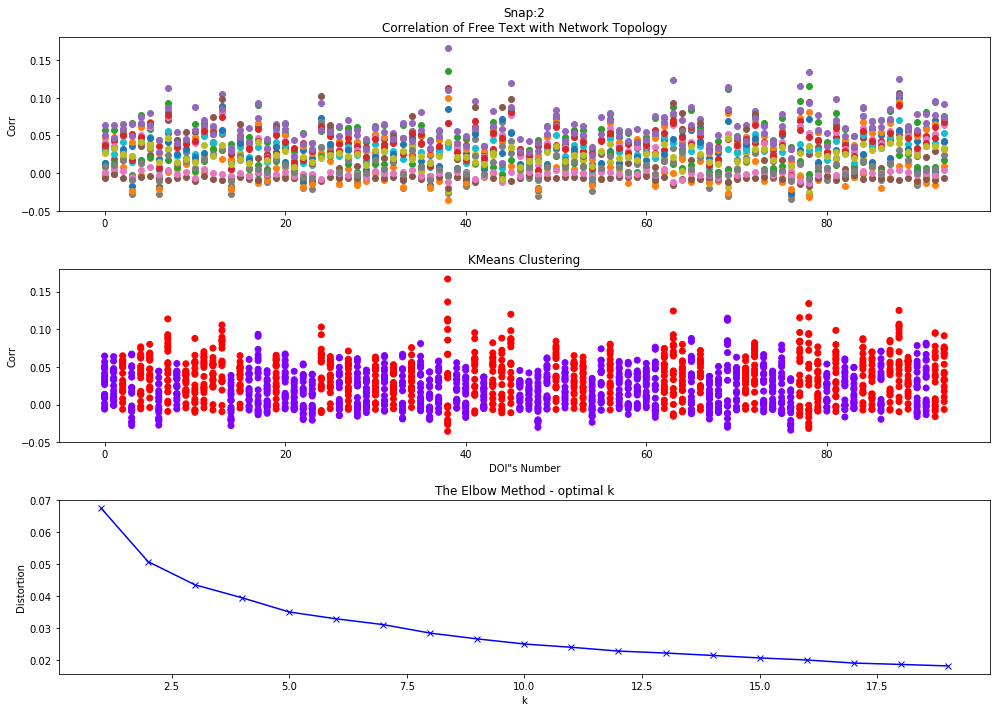

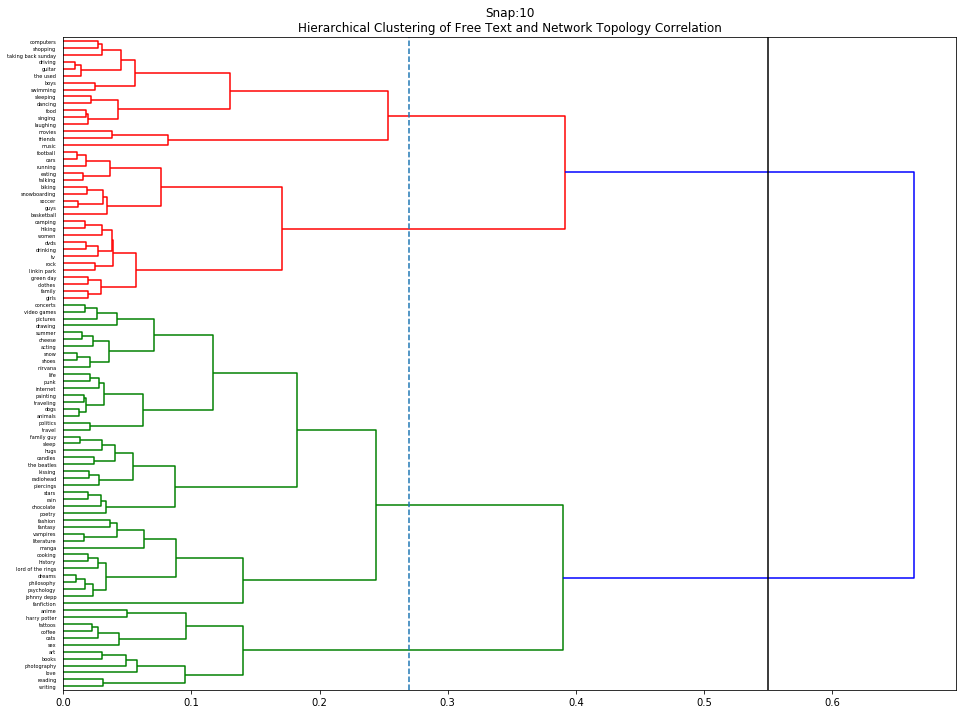

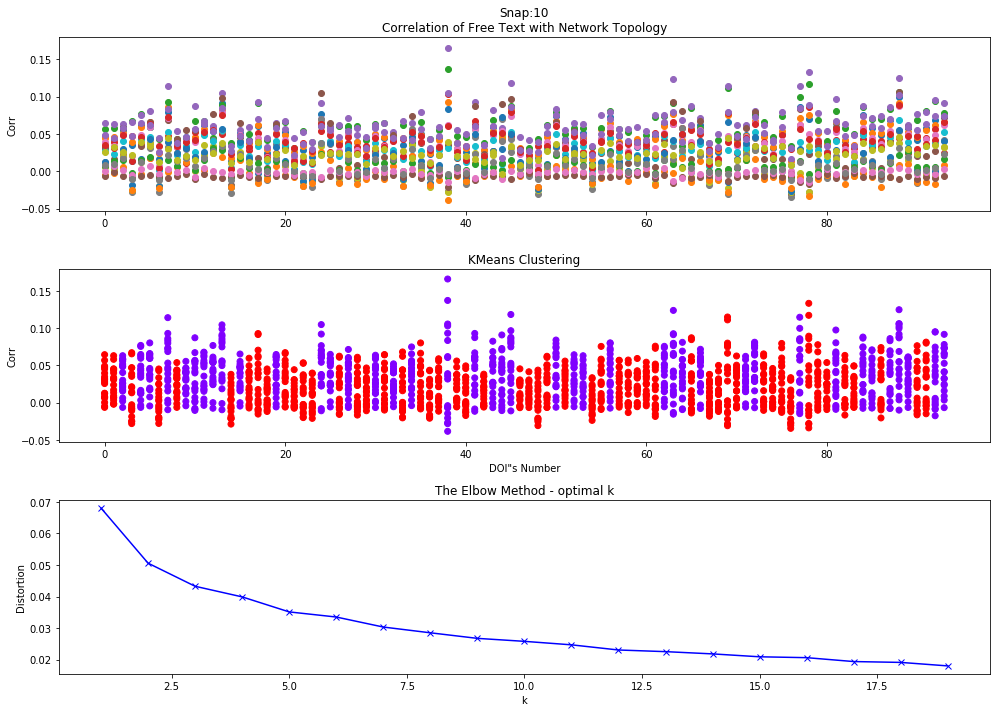

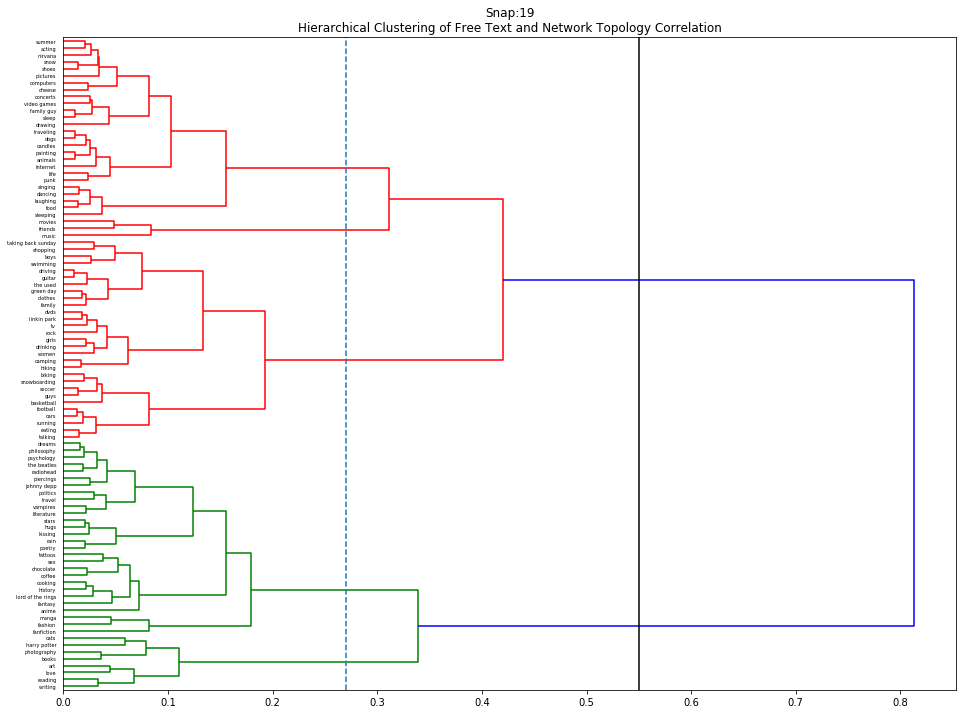

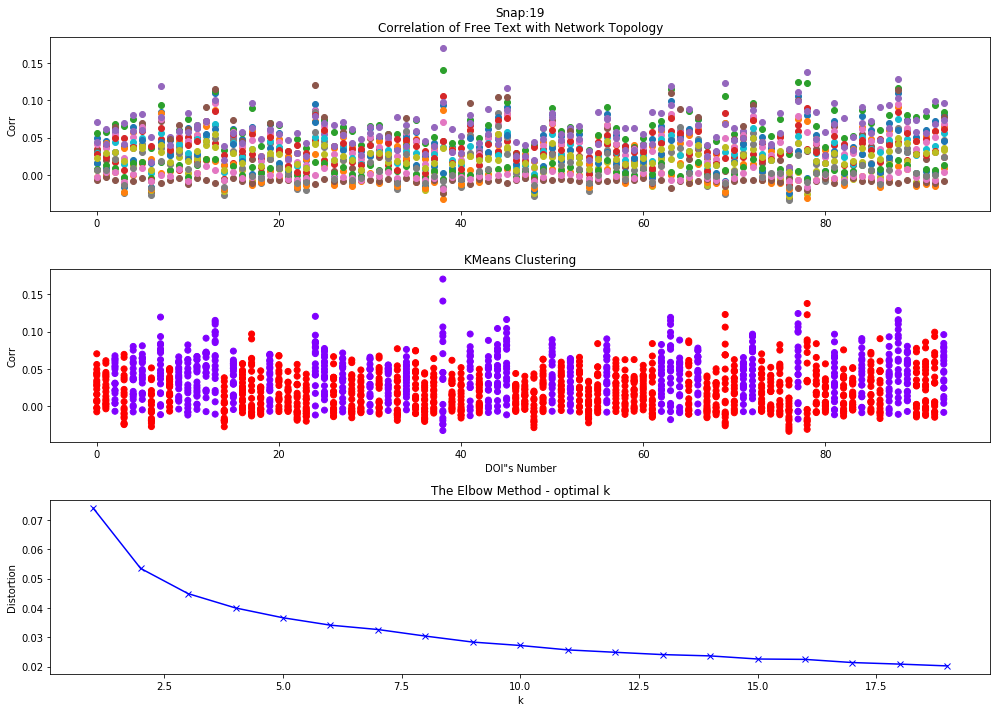

In [102]:
# -*- coding: utf-8 -*-
# unsupervised analysis of correlation of Free Text (FT) with Network Topology (NT) 

"""
algorithms we used:
*Hierarchical
*Kmeans
*PCA
@author: Yuval Samoilov-Katz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline
        
snaps = [1,2,10,19]
clusters = 2
for snap in snaps:
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap))
    X = dataset.iloc[:, 1:20].values
    DOIs = dataset['DOIs'].values
    base = np.arange(0,len(DOIs),1)
    ## Hierarchical analysis to explore main clusters
    fig, axes = plt.subplots(figsize=(16,12), nrows=1, ncols=1)
    
    ### visualize dendogram
    dend1 = shc.dendrogram(shc.linkage(X, method='ward'),labels=DOIs , orientation='right',ax=axes)
    axes.title.set_text(f'Snap:{snap}\nHierarchical Clustering of Free Text and Network Topology Correlation')
    plt.axvline(x=0.55, color='black') 
    plt.axvline(x=0.27,linestyle='--',) 
    plt.savefig(f'Results/hei_{snap}')
    
    ### get clusters of DOIs 
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean',linkage='ward')
    cluster.fit_predict(X)
    
    ## Kmeans analysis
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    
    fig, ax = plt.subplots(figsize=(14,10), nrows=3, ncols=1)    
    for i,feature in enumerate(dataset.columns[:-1]):
        ax[0].scatter(base, X[:,i], label=f'{feature}')
        ax[1].scatter(base, X[:,i], c=kmeans.labels_, cmap='rainbow')
        
    
    ax[0].title.set_text(f'Snap:{snap}\nCorrelation of Free Text with Network Topology')
    ax[0].set_ylabel('Corr')
    ax[1].title.set_text('KMeans Clustering')
    ax[1].set_xlabel('DOI"s Number')
    ax[1].set_ylabel('Corr')
    
    ### Elbow method to determine the number of clusters
    distortions = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])                   
    
    ax[2].plot(K, distortions, 'bx-')
    ax[2].set_xlabel('k')
    ax[2].set_ylabel('Distortion')
    ax[2].title.set_text('The Elbow Method - optimal k')

    plt.tight_layout()
    plt.savefig(f'Results/clustering_{snap}')

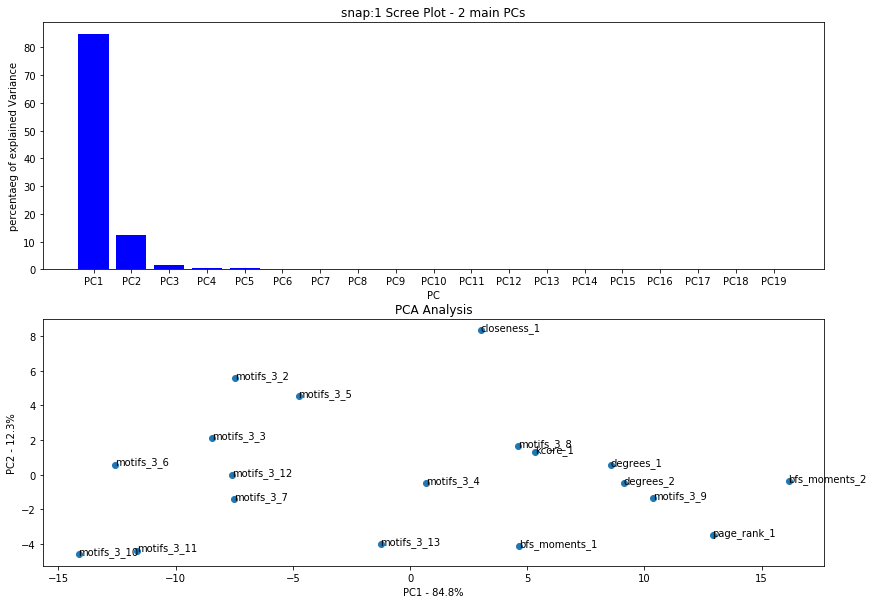

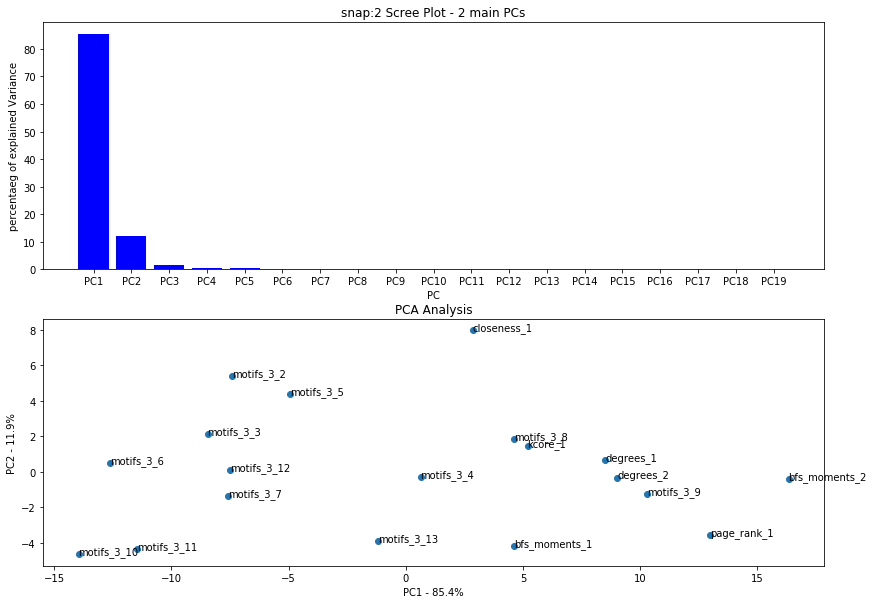

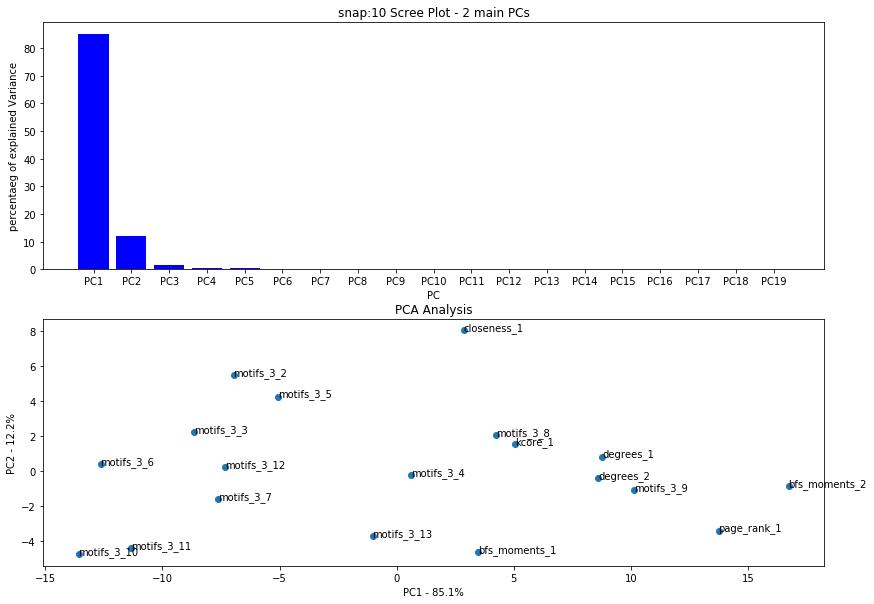

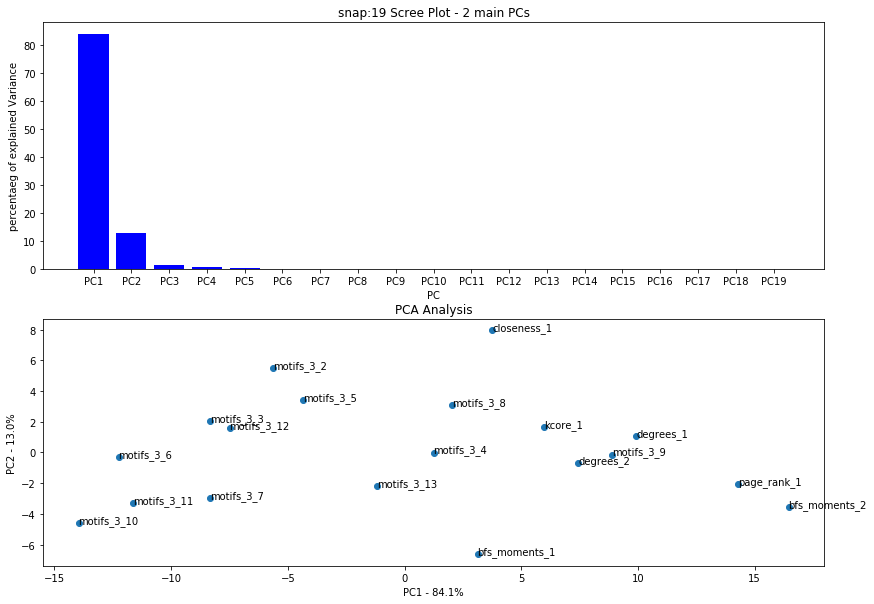

In [95]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

for snap in snaps:
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)

    fig, ax = plt.subplots(figsize=(14,10), nrows=2, ncols=1)    

    ## PCA analysis for explaining the 2 main clusters
    norm_data = preprocessing.scale(dataset.T)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## number of PC we need
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'snap:{snap} Scree Plot - 2 main PCs')        
    
    #main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.columns)
    ax[1].scatter(pca_df.PC1,pca_df.PC2)
    ax[1].set_title(f'PCA Analysis')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    for s in pca_df.index:
        ax[1].annotate(s,(pca_df.PC1.loc[s], pca_df.PC2.loc[s]))
    plt.savefig(f'Results/PCA_snap_{snap}')

    
    